In [7]:
print(df.columns)

Index(['type', 'text', 'likes', 'time', 'character', 'sentiment', 'platform'], dtype='object')


In [11]:
for platform, path in files.items():
    df_test = pd.read_csv(path, nrows=5)  
    print(f"{platform} columns:", df_test.columns)

Reddit columns: Index(['comment_id', 'text', 'date', 'subreddit', 'character', 'sentiment',
       'cleaned_text'],
      dtype='object')
Bilibili columns: Index(['type', 'text', 'likes', 'time', 'character', 'sentiment'], dtype='object')
Weibo columns: Index(['评论', 'Timestamp', 'Sentiment Score'], dtype='object')
Douban columns: Index(['sentiment', 'text', 'date', 'votes'], dtype='object')


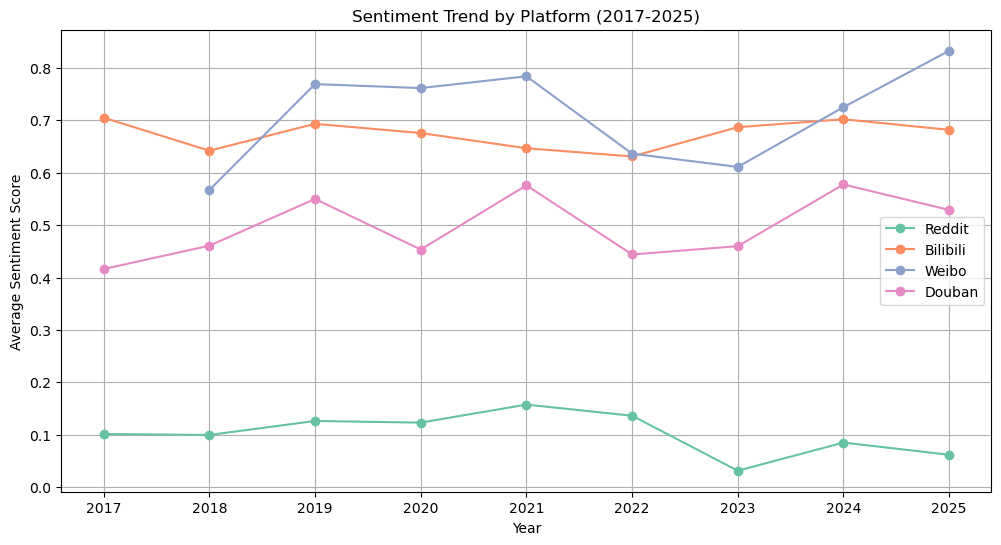

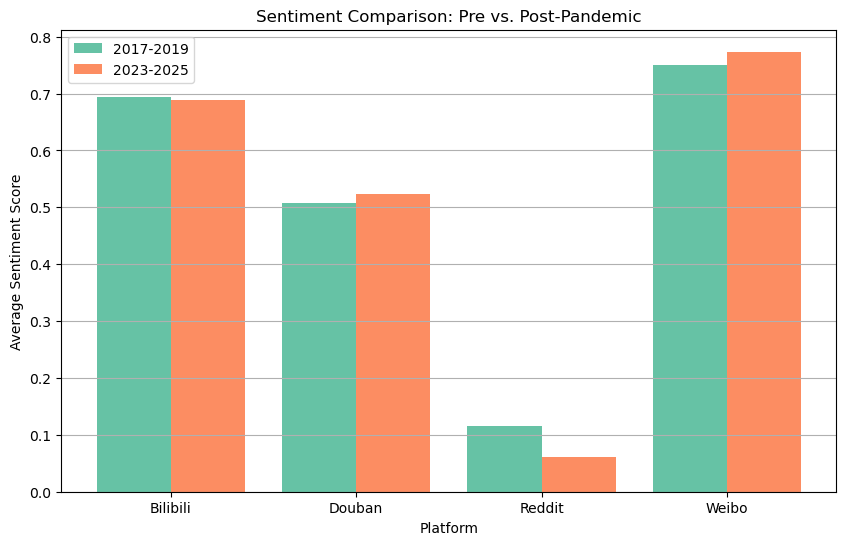

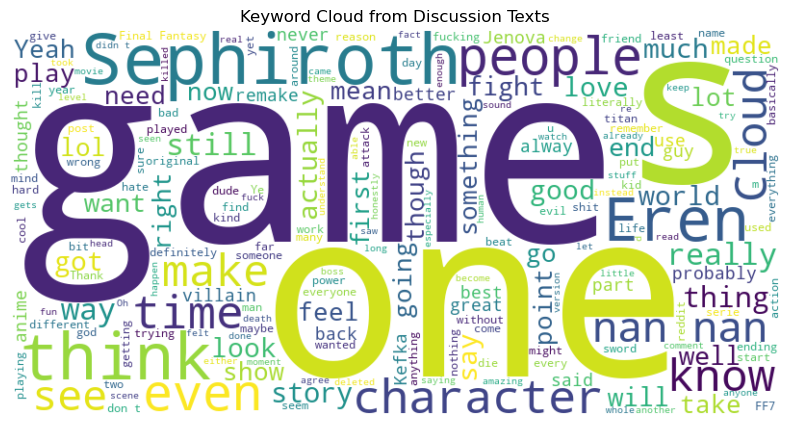

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import re
from collections import Counter

# Define file paths for each platform dataset
files = {
    "Reddit": r"C:\Users\wusiq\Group1DataAnalysis\dataset3_cleaned.csv",
    "Bilibili": r"C:\Users\wusiq\Group1DataAnalysis\dataSet1\dataset 1\dataset 1\bilbil\bilibili_data_combined_sentiment.csv",
    "Weibo": r"C:\Users\wusiq\Group1DataAnalysis\dataSet1\dataset 1\dataset 1\weiboi dataset\cleaned_sentiment_data.csv",
    "Douban": r"C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_final.csv"
}

# Define correct column mappings for each dataset
column_mapping = {
    "Reddit": {"date_column": "date", "sentiment_column": "sentiment"},
    "Bilibili": {"date_column": "time", "sentiment_column": "sentiment"},
    "Weibo": {"date_column": "Timestamp", "sentiment_column": "Sentiment Score"},
    "Douban": {"date_column": "date", "sentiment_column": "sentiment"}
}

# Load all datasets, standardize column names, and add a 'platform' label
all_data = []
for platform, path in files.items():
    df = pd.read_csv(path)
    date_col = column_mapping[platform]["date_column"]  # Extract correct date column
    sentiment_col = column_mapping[platform]["sentiment_column"]  # Extract correct sentiment column
    df = df.rename(columns={date_col: "date", sentiment_col: "sentiment"})  # Standardize column names
    df["platform"] = platform  # Add platform identifier
    df["date"] = pd.to_datetime(df["date"], errors='coerce')  # Convert date to datetime format
    df = df.dropna(subset=["date", "sentiment"])  # Remove rows with missing date or sentiment
    all_data.append(df)  # Store processed data

# Concatenate all datasets into a single DataFrame
df = pd.concat(all_data, ignore_index=True)

# Extract the year from the date column
df["year"] = df["date"].dt.year

# Filter data to only include years from 2017 to 2025
df_filtered = df[(df["year"] >= 2017) & (df["year"] <= 2025)]

# Use Set2 color palette from Matplotlib
colors = plt.get_cmap("Set2").colors

# Plot sentiment trend over time for different platforms
plt.figure(figsize=(12, 6))
for idx, platform in enumerate(df["platform"].unique()):
    platform_data = df_filtered[df_filtered["platform"] == platform]  # Select data for the platform
    trend_data = platform_data.groupby("year")["sentiment"].mean()  # Compute average sentiment per year
    plt.plot(trend_data.index, trend_data.values, marker="o", linestyle="-", label=platform, color=colors[idx % len(colors)])  # Plot trend

plt.xticks(range(2017, 2026))  # Set x-axis range
plt.xlabel("Year")  # Label x-axis
plt.ylabel("Average Sentiment Score")  # Label y-axis
plt.title("Sentiment Trend by Platform (2017-2025)")  # Set plot title
plt.legend()  # Add legend to differentiate platforms
plt.grid(True)  # Add grid for better readability
plt.show()

# Define pre-pandemic (2017-2019) and post-pandemic (2023-2025) periods
pre_pandemic = df_filtered[(df_filtered["year"] >= 2017) & (df_filtered["year"] <= 2019)]
post_pandemic = df_filtered[(df_filtered["year"] >= 2023) & (df_filtered["year"] <= 2025)]

# Compute average sentiment score for each platform before and after the pandemic
sentiment_pre = pre_pandemic.groupby("platform")["sentiment"].mean()
sentiment_post = post_pandemic.groupby("platform")["sentiment"].mean()

# Create bar chart to compare sentiment scores before and after the pandemic
x = np.arange(len(sentiment_pre.index))  # Define x-axis positions for bars
width = 0.4  # Define bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, sentiment_pre.values, width, label="2017-2019", color=colors[0])  # Pre-pandemic sentiment
plt.bar(x + width/2, sentiment_post.values, width, label="2023-2025", color=colors[1])  # Post-pandemic sentiment

plt.xticks(x, sentiment_pre.index)  # Set x-axis labels to platform names
plt.xlabel("Platform")  # Label x-axis
plt.ylabel("Average Sentiment Score")  # Label y-axis
plt.title("Sentiment Comparison: Pre vs. Post-Pandemic")  # Set plot title
plt.legend()  # Add legend to differentiate time periods
plt.grid(axis="y")  # Add horizontal grid lines for readability
plt.show()

# Generate word cloud from text data
text_data = " ".join(df["text"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Keyword Cloud from Discussion Texts")
plt.show()


In [10]:
import pandas as pd

# Define file paths
file_paths = {
    "Reddit": r"C:\Users\wusiq\Group1DataAnalysis\dataset3_cleaned.csv",
    "Bilibili": r"C:\Users\wusiq\Group1DataAnalysis\dataSet1\dataset 1\dataset 1\bilbil\bilibili_data_combined_sentiment.csv",
    "Weibo": r"C:\Users\wusiq\Group1DataAnalysis\dataSet1\dataset 1\dataset 1\weiboi dataset\cleaned_sentiment_data.csv",
    "Douban": r"C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_final.csv"
}

# Expected columns in the final dataset
expected_columns = ["month", "source", "Sentiment Category", "count"]

# Dictionary to store cleaned data
dataframes = {}

# Load and clean each dataset
for source, path in file_paths.items():
    try:
        df = pd.read_csv(path)

        # Display basic info for debugging
        print(f"\n{source} - Shape: {df.shape}")
        print(df.head())

        # Standardize column names
        if "date" in df.columns:
            df.rename(columns={"date": "month"}, inplace=True)
        if "Timestamp" in df.columns:  # Weibo
            df.rename(columns={"Timestamp": "month"}, inplace=True)
        if "time" in df.columns:  # Bilibili
            df.rename(columns={"time": "month"}, inplace=True)
        if "sentiment" in df.columns:
            df.rename(columns={"sentiment": "Sentiment Category"}, inplace=True)
        if "Sentiment Score" in df.columns:  # Weibo/Douban
            df.rename(columns={"Sentiment Score": "Sentiment Category"}, inplace=True)

        # Convert sentiment score to category (if needed)
        if df["Sentiment Category"].dtype in [float, int]:
            df["Sentiment Category"] = df["Sentiment Category"].apply(
                lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
            )

        # Ensure count column exists
        if "count" not in df.columns:
            df["count"] = 1  # Assign default count

        # Convert `month` to datetime and handle errors
        if "month" in df.columns:
            df["month"] = df["month"].astype(str)  # Convert all to string
            df["month"] = df["month"].replace("unknown", pd.NaT)  # Replace "unknown" with NaT
            df["month"] = pd.to_datetime(df["month"], errors="coerce")  # Convert to datetime
        else:
            df["month"] = pd.NaT  # Default to NaT if missing

        # Drop invalid date rows
        df = df.dropna(subset=["month"])

        # Assign source column
        df["source"] = source

        # Keep only required columns
        df = df[expected_columns]

        # Store cleaned dataframe
        dataframes[source] = df

    except Exception as e:
        print(f"Error loading {source}: {e}")

# Merge all datasets into one
merged_df = pd.concat(dataframes.values(), ignore_index=True)

# Save merged dataset
output_path = r"C:\Users\wusiq\Group1DataAnalysis\merged_sentiment_data.csv"
merged_df.to_csv(output_path, index=False)

print(f"\nMerged dataset saved! Total rows: {merged_df.shape[0]} at {output_path}")



📂 Reddit - Shape: (70867, 7)
  comment_id                                               text  \
0    m0xm2rl  # Make sure to flair posts correctly so you do...   
1    m0xp1sd  The entire bottom row could be Eren depending ...   
2    m0xrwc1  Please let the bottom row be all different era...   
3    m0xqput                                           Butthole   
4    m0xnp2r                                        Poor grisha   

                  date      subreddit    character  sentiment  \
0  2024-12-07 21:38:00  attackontitan  Eren Yeager     0.5574   
1  2024-12-07 21:54:12  attackontitan  Eren Yeager     0.0000   
2  2024-12-07 22:09:58  attackontitan  Eren Yeager     0.3182   
3  2024-12-07 22:03:26  attackontitan  Eren Yeager     0.0000   
4  2024-12-07 21:46:47  attackontitan  Eren Yeager    -0.4767   

                                        cleaned_text  
0  make sure flair posts correctly spoil story ot...  
1  entire bottom row could eren depending point s...  
2  please l

In [13]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\wusiq\Group1DataAnalysis\merged_sentiment_data.csv"
df = pd.read_csv(file_path)

# Convert month column to datetime format
df["month"] = pd.to_datetime(df["month"], errors="coerce")

# Ensure the month column is valid
df = df.dropna(subset=["month"])

# Define the COVID-19 timeline cutoff (December 31, 2019)
cutoff_date = pd.Timestamp("2019-12-31")

# Assign Hypothesis labels:
# H0: No significant change after COVID-19
# H1: Increased acceptance of anti-heroes after COVID-19
df["Hypothesis"] = df["month"].apply(lambda x: "H0" if x <= cutoff_date else "H1")

# Save the updated dataset
output_path = r"C:\Users\wusiq\Group1DataAnalysis\merged_sentiment_data_updated.csv"
df.to_csv(output_path, index=False)

print(f"H0 and H1 assigned based on COVID-19 timeline! New shape: {df.shape}")
print(f"Updated dataset saved at: {output_path}")


H0 and H1 assigned based on COVID-19 timeline! New shape: (86610, 5)
Updated dataset saved at: C:\Users\wusiq\Group1DataAnalysis\merged_sentiment_data_updated.csv


In [14]:
import pandas as pd

# Load dataset again
df = pd.read_csv(r"C:\Users\wusiq\Group1DataAnalysis\merged_sentiment_data.csv")

# Convert month column to datetime
df["month"] = pd.to_datetime(df["month"], errors="coerce")

# Define the cutoff date for COVID-19 (December 2019)
cutoff_date = pd.Timestamp("2019-12-31")

# Assign Hypothesis labels
df["Hypothesis"] = df["month"].apply(lambda x: "H0" if x <= cutoff_date else "H1")

# Print unique values in Hypothesis column
print("Unique Hypothesis values:", df["Hypothesis"].unique())

# Save updated dataset
df.to_csv(r"C:\Users\wusiq\Group1DataAnalysis\merged_sentiment_data_updated.csv", index=False)

print("H0 and H1 assigned based on COVID-19 timeline! New shape:", df.shape)
print("Updated dataset saved at: C:\\Users\\wusiq\\Group1DataAnalysis\\merged_sentiment_data_updated.csv")


Unique Hypothesis values: ['H1' 'H0']
H0 and H1 assigned based on COVID-19 timeline! New shape: (86610, 5)
Updated dataset saved at: C:\Users\wusiq\Group1DataAnalysis\merged_sentiment_data_updated.csv


In [18]:
import pandas as pd

# Define the file path
file_path = r"C:\Users\wusiq\Group1DataAnalysis\merged_sentiment_data.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Convert the "month" column to datetime format
df['month'] = pd.to_datetime(df['month'])

# Define pre-pandemic and post-pandemic time periods
pre_pandemic = df[(df['month'] >= '2017-01-01') & (df['month'] < '2020-01-01')]
post_pandemic = df[(df['month'] >= '2020-01-01') & (df['month'] < '2023-01-01')]

# Count the number of discussions per platform (source)
source_pre_counts = pre_pandemic.groupby('source')['count'].sum()
source_post_counts = post_pandemic.groupby('source')['count'].sum()

# Calculate the growth rate for each platform (handling division by zero)
growth_rate = ((source_post_counts - source_pre_counts) / source_pre_counts.replace(0, 1)) * 100

# Display the results
print("\nDiscussion Growth Rate Before and After the Pandemic (%):")
print(growth_rate)

# Save results to a CSV file
output_path = r"C:\Users\wusiq\Group1DataAnalysis\discussion_growth_rate.csv"
growth_rate.to_csv(output_path, index=True)

print(f"\nGrowth rate successfully saved to '{output_path}'!")



Discussion Growth Rate Before and After the Pandemic (%):
source
Bilibili    -55.158730
Douban      -38.556194
Reddit      223.042862
Weibo       -22.570533
Name: count, dtype: float64

Growth rate successfully saved to 'C:\Users\wusiq\Group1DataAnalysis\discussion_growth_rate.csv'!
